# Mushrooms CLassifier
Pada notebook ini saya membuat model machine learning untuk melakukan klasifikasi apakah jamur bisa dimakan atau tidak. 

## Import Library
disini saya mengimport beberapa library standar yang biasa digunakan untuk membuat model machine learning dan data analisis, seperti: `sklearn`,`numpy`,`pandas` dll. saya juga menginstall package [luwiji](https://pypi.org/project/luwiji/). `luwiji` adalah package yang dikembangkan oleh Wira D. K. Putra sebagai pelengkap kurikulum pembelajaran mesinnya bagi para peminat pembelajaran mesin muda. disini saya hanya akan mengambil hyperparameter yang didapat oleh Wira D. K. Putra.

In [1]:
!pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40.3 MB 1.3 MB/s 
     |████████████████████████████████| 100 kB 10.1 MB/s 
  Created wheel for luwiji: filename=luwiji-1.2.0-py2.py3-none-any.whl size=40366854 sha256=84685c4df7ee071c5ba4cd5cd2ee12e193ad9214e8807cc9102d130b98415d9a
  Stored in directory: /root/.cache/pip/wheels/9d/70/24/4a289d3d2fc69696e63e2cf79aba782a51ff2c2c313697dd32
  Created wheel for jcopml: filename=jcopml-1.2.0-py2.py3-none-any.whl size=32032 sha256=e360a875bced7b020629d9b82fcb068b6bce4ef5296e009e82cfba43a6557708
  Stored in directory: /root/.cache/pip/wheels/da/9c/84/0670d7771fe7a5383c1ee4506df03e664d1f9abeb54db10e1d
Successfully built luwiji jcopml


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Tentang Dataset
Dataset ini mencakup deskripsi sampel hipotetis yang sesuai dengan 23 spesies jamur insang di Agaricus dan Jamur Keluarga Lepiota yang diambil dari The Audubon Society Field Guide to North American Mushrooms (1981).

In [3]:
mushrooms = pd.read_csv("mushrooms.csv")
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Exploratory Data Analysis - Deskripsi Variabel

### Melihat missing value pada dataset
hal pertama yang harus saya lakukan adalah melihat missing value pada dataset. sehingga didapatkan sebagai berikut:

In [4]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
mushrooms.shape

(8124, 23)

In [6]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
mushrooms.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

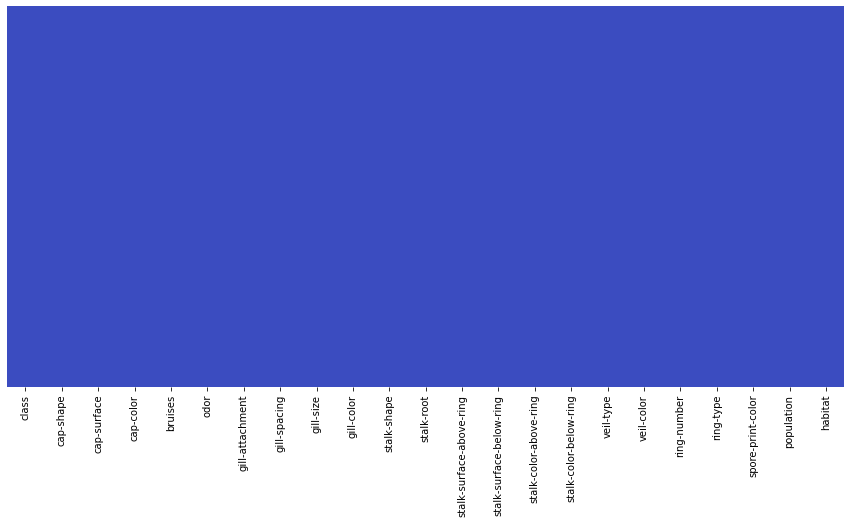

In [8]:
plt.figure(figsize=(15,7))
sns.heatmap(mushrooms.isnull(), yticklabels=False, cbar=False, cmap='coolwarm');

dari analisa dan ploting di atas, bisa kita ketahui bahwa tidak ada missing value pada dataset yang digunakan dan semua features pada data bertipe categorical features

## Categorical Analysis
karena semua features data adalah data categorical, maka saya hanya akan melakukan analisa secara categorical

In [9]:
mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
categorical_features = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                        'stalk-surface-below-ring', 'stalk-color-above-ring',
                        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                        'ring-type', 'spore-print-color', 'population', 'habitat']

### Categorical Features
pada tahap ini saya akan melihat persebaran data pada `Categorical_Features` dan didapat sebagai berikut:

   jumlah sampel  persentase
e           4208        51.8
p           3916        48.2


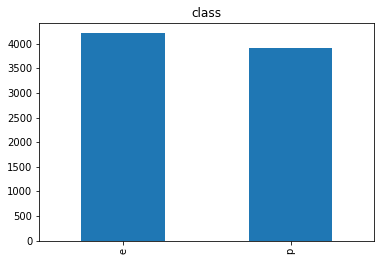

In [11]:
feature = categorical_features[0]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
x           3656        45.0
f           3152        38.8
k            828        10.2
b            452         5.6
s             32         0.4
c              4         0.0


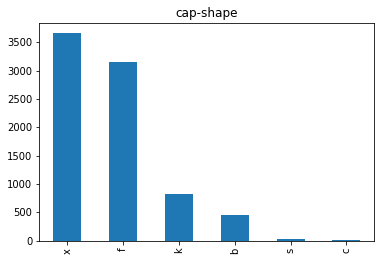

In [12]:
feature = categorical_features[1]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
y           3244        39.9
s           2556        31.5
f           2320        28.6
g              4         0.0


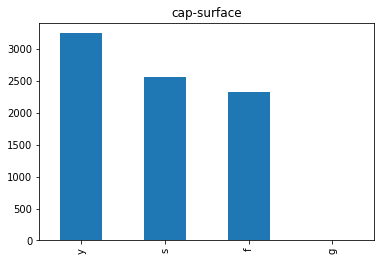

In [13]:
feature = categorical_features[2]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
n           2284        28.1
g           1840        22.6
e           1500        18.5
y           1072        13.2
w           1040        12.8
b            168         2.1
p            144         1.8
c             44         0.5
u             16         0.2
r             16         0.2


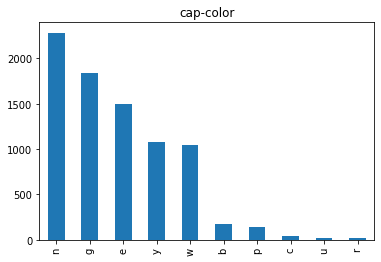

In [14]:
feature = categorical_features[3]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
f           4748        58.4
t           3376        41.6


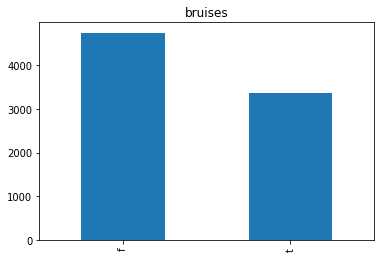

In [15]:
feature = categorical_features[4]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
n           3528        43.4
f           2160        26.6
y            576         7.1
s            576         7.1
a            400         4.9
l            400         4.9
p            256         3.2
c            192         2.4
m             36         0.4


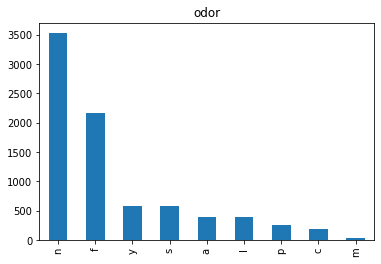

In [16]:
feature = categorical_features[5]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
f           7914        97.4
a            210         2.6


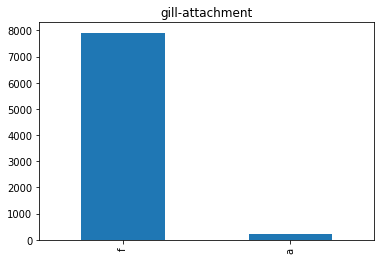

In [17]:
feature = categorical_features[6]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
c           6812        83.9
w           1312        16.1


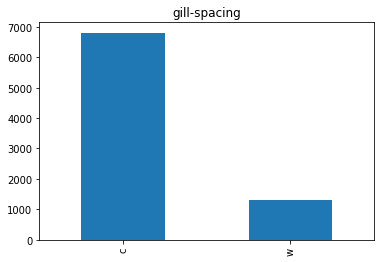

In [18]:
feature = categorical_features[7]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
b           5612        69.1
n           2512        30.9


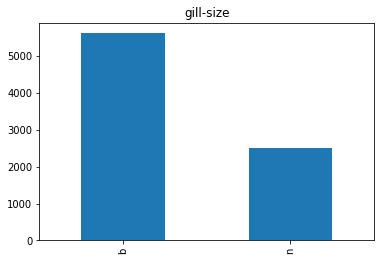

In [19]:
feature = categorical_features[8]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
b           1728        21.3
p           1492        18.4
w           1202        14.8
n           1048        12.9
g            752         9.3
h            732         9.0
u            492         6.1
k            408         5.0
e             96         1.2
y             86         1.1
o             64         0.8
r             24         0.3


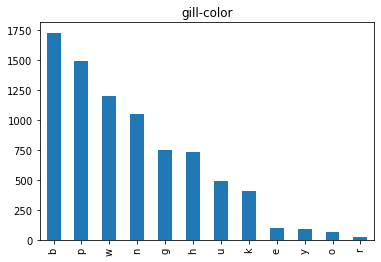

In [20]:
feature = categorical_features[9]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
t           4608        56.7
e           3516        43.3


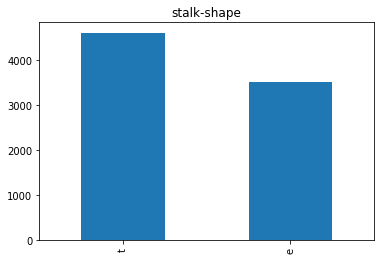

In [21]:
feature = categorical_features[10]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
b           3776        46.5
?           2480        30.5
e           1120        13.8
c            556         6.8
r            192         2.4


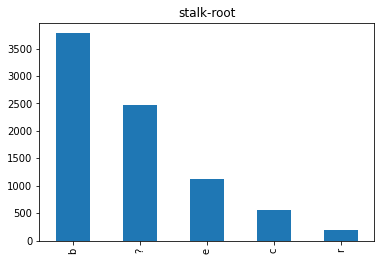

In [22]:
feature = categorical_features[11]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
s           5176        63.7
k           2372        29.2
f            552         6.8
y             24         0.3


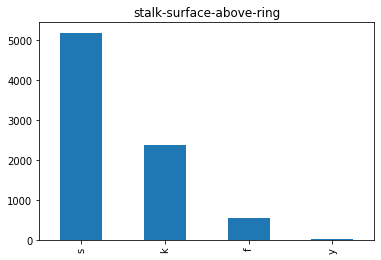

In [23]:
feature = categorical_features[12]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
s           4936        60.8
k           2304        28.4
f            600         7.4
y            284         3.5


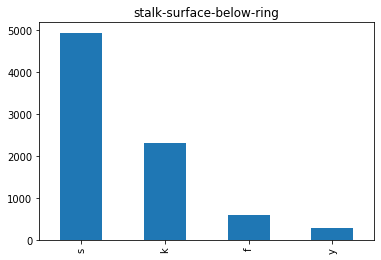

In [24]:
feature = categorical_features[13]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
w           4464        54.9
p           1872        23.0
g            576         7.1
n            448         5.5
b            432         5.3
o            192         2.4
e             96         1.2
c             36         0.4
y              8         0.1


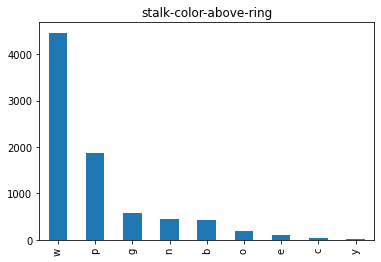

In [25]:
feature = categorical_features[14]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
w           4384        54.0
p           1872        23.0
g            576         7.1
n            512         6.3
b            432         5.3
o            192         2.4
e             96         1.2
c             36         0.4
y             24         0.3


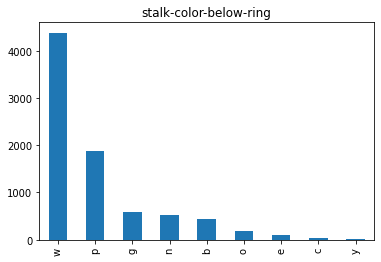

In [26]:
feature = categorical_features[15]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
p           8124       100.0


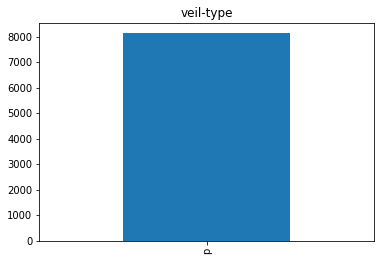

In [27]:
feature = categorical_features[16]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
w           7924        97.5
n             96         1.2
o             96         1.2
y              8         0.1


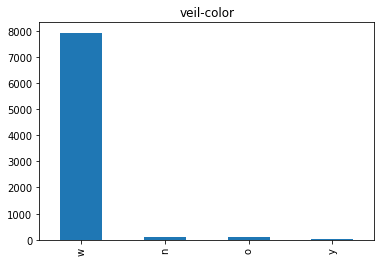

In [28]:
feature = categorical_features[17]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
o           7488        92.2
t            600         7.4
n             36         0.4


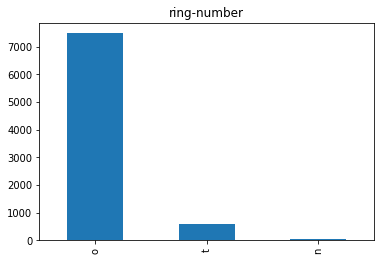

In [29]:
feature = categorical_features[18]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
p           3968        48.8
e           2776        34.2
l           1296        16.0
f             48         0.6
n             36         0.4


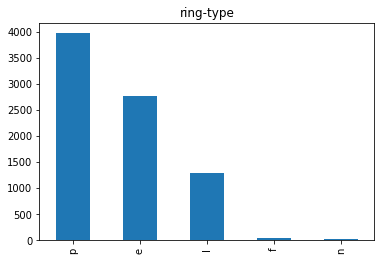

In [30]:
feature = categorical_features[19]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
w           2388        29.4
n           1968        24.2
k           1872        23.0
h           1632        20.1
r             72         0.9
u             48         0.6
o             48         0.6
y             48         0.6
b             48         0.6


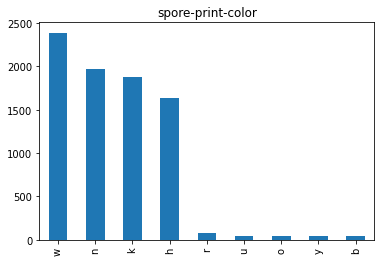

In [31]:
feature = categorical_features[20]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
v           4040        49.7
y           1712        21.1
s           1248        15.4
n            400         4.9
a            384         4.7
c            340         4.2


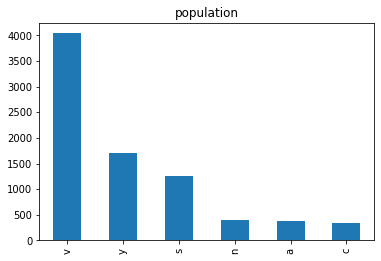

In [32]:
feature = categorical_features[21]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
v           4040        49.7
y           1712        21.1
s           1248        15.4
n            400         4.9
a            384         4.7
c            340         4.2


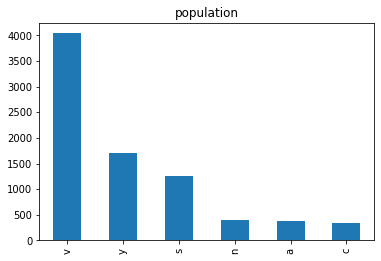

In [33]:
feature = categorical_features[21]
count = mushrooms[feature].value_counts()
percent = 100*mushrooms[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Dari grafik persebaran data pada masing-masing feature, ada satu features yang tidak memberikan insight yaitu `veil-type`, oleh karena itu features tersebut perlu dibuang.

In [34]:
categorical_features.remove('veil-type')
categorical_features.remove('class')
mushrooms.drop(columns='veil-type', inplace=True)
categorical_features

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

## Train-Test-Split Dataset
karena ukuran data lebih besar dari 5000 maka saya menggunakan 25% untuk data test dan 75% untuk data train

In [35]:
X = mushrooms.drop(columns='class')
y = mushrooms['class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6093, 21) (2031, 21) (6093,) (2031,)


## Data Preparation
### Standarisasi
pada tahap standarisasi, karena features data merupakan `categorical_features` maka saya menggunakan `OneHotEncode` yang terdapat pada `sklearn`
### Pipeline
untuk mempermudah dan menyingkat code pada data preparation saya menggunakan `Pipeline` pada sklearn. dengan menggunakan Pipeline, code akan lebih singkat dan mudah dibaca.


In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
cat_pip = Pipeline([
  ('Onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer([
  ('categoric', cat_pip, categorical_features)
])

## Model Development
### Model Development Dengan LogisticRegression
pada tahap development pertama, saya menggunakan algoritma LogisticRegression sebagai baseline(dasar) dari model machine learning yang saya buat. dan untuk hyperparameter saya menggunakan hyperparameter yang terdapat pada package `luwiji` tepatnya pada library `jcopml.tuning`, pada library tersebut banyak properti yang berisi berbagai hyperparameter untuk berbagai algoritma machine learning. untuk mendapatkan best parameter saya menggunakan method `GridSearchCV` pada sklearn. 

In [38]:
from jcopml.tuning import grid_search_params as gsp
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [39]:
pipeline = Pipeline([
  ('prep', preprocessor),
  ('algo', LogisticRegression())
])

LogisticR = GridSearchCV(pipeline, gsp.linreg_params, cv=3, n_jobs=-1, verbose=1)
LogisticR.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categoric',
                                                                         Pipeline(steps=[('Onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['cap-shape',
                                                                          'cap-surface',
                                                                          'cap-color',
                                                                          'bruises',
                                                                          'odor',
                                                                          'gill-attachment',
                                                                          'gill-spacing',
                        


### Model Development dengan SVM
untuk model machine learning menggunakan algoritma `SVM Classifier`. saya juga menggunakan hyperparameter yang terdapat pada pakcage `luwiji` dan untuk mendapatkan best parameter saya menggunakan `GridSearchCV`. 

In [40]:
from sklearn.svm import SVC

In [41]:
pipeline = Pipeline([
  ('prep', preprocessor),
  ('algo', SVC(max_iter=500))
])

svm = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
svm.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categoric',
                                                                         Pipeline(steps=[('Onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['cap-shape',
                                                                          'cap-surface',
                                                                          'cap-color',
                                                                          'bruises',
                                                                          'odor',
                                                                          'gill-attachment',
                                                                          'gill-spacing',
                        

### Model Development Dengan RandomForest
pada random forest ini untuk mendapatkan best parameter saya menggunakan method `RandomizedSearchCV`. alasannya karena menggunakan `GridsearchCV` proses train terlalu lama, dan untuk mempercepat proses train maka saya menggunakan method lain yaitu `RandomizedSearchCV`.

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [43]:
pipeline = Pipeline([
  ('prep', preprocessor),
  ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

RF = RandomizedSearchCV(pipeline, rsp.rf_params,n_iter=50, verbose=1, cv=10, n_jobs=-1)
RF.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('categoric',
                                                                               Pipeline(steps=[('Onehot',
                                                                                                OneHotEncoder())]),
                                                                               ['cap-shape',
                                                                                'cap-surface',
                                                                                'cap-color',
                                                                                'bruises',
                                                                                'odor',
                                                                                'gill-attachment',
                                               

Setelah melakukan train, selanjutnya menampilkan hasil score yang diperoleh oleh masing-masing model

In [44]:
model_score = pd.DataFrame(columns=['Train_score'], index=['SVM','LogisticRegression','RandomForest'])
 
# membuat dictionary untuk setiap algoritma yang digunakan
model_dict = {'SVM': svm,'LogisticRegression': LogisticR,'RandomForest':RF}


for name, model in model_dict.items():
    model_score.loc[name, 'Train_score'] = model.score(X_train,y_train)
 
model_score

,Train_score
SVM,1.0
LogisticRegression,1.0
RandomForest,1.0


## Evaluasi Model

Untuk evaluasi model, saya menggunakan `accuracy_score`, `precision_score` dan `recall_score` yang terdapat pada `sklearn`

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [46]:
model_evaluate = pd.DataFrame(columns=['acc', 'Precision', 'Recall'], index=['SVM','LogisticRegression','RandomForest'])
 
# membuat dictionary untuk setiap algoritma yang digunakan
model_dict = {'SVM': svm,'LogisticRegression': LogisticR,'RandomForest':RF}
 
# menghitung accuracy, precision dan recall masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    y_pred = model.predict(X_test)
    model_evaluate.loc[name, 'acc'] = accuracy_score(y_test, y_pred)
    model_evaluate.loc[name, 'Precision'] = precision_score(y_test, y_pred, average="binary", pos_label="e")
    model_evaluate.loc[name, 'Recall'] = recall_score(y_test, y_pred, average="binary", pos_label="e")
 
model_evaluate

,acc,Precision,Recall
SVM,1.0,1.0,1.0
LogisticRegression,1.0,1.0,1.0
RandomForest,1.0,1.0,1.0


dapat dilihat hasilnya cukup baik walaupun hanya menggunakan model LogisticRegression. selanjutnya saya akan menguji model dan didapat hasil sebagai berikut:

In [47]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_SVM,prediksi_LogisticRegression,prediksi_RandomForest
1971,e,e,e,e
6654,p,p,p,p
5606,p,p,p,p
3332,e,e,e,e
6988,p,p,p,p
5761,p,p,p,p
5798,p,p,p,p
3064,p,p,p,p
1811,e,e,e,e
3422,e,e,e,e
